In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn
#!pip install xgboost
#!pip install catboost
#!pip install lightgbm



In [1]:
import numpy as np  # Importation de la bibliothèque numpy pour les opérations sur les tableaux
import pandas as pd  # Importation de la bibliothèque pandas pour la manipulation de données

# Chargement des données d'entraînement à partir du fichier CSV spécifié, avec gestion de la grande quantité de données
train = pd.read_csv("train.csv", low_memory=False)
# Chargement des données de test à partir du fichier CSV spécifié, avec gestion de la grande quantité de données
test = pd.read_csv("test.csv", low_memory=False)


In [3]:
# Réduction du DataFrame 'train' aux 5000 premières lignes pour faciliter le traitement
train = train[:5000]


In [4]:
# Réduction du DataFrame 'test' aux 2500 premières lignes pour faciliter le traitement
test = test[:2500]


In [5]:
# Liste des colonnes à supprimer des DataFrames 'train' et 'test'
# Ces colonnes sont considérées comme non pertinentes pour l'analyse ou le modèle de prédiction
drop_columns = ['ID', "Customer_ID", "Name", "SSN", "Credit_History_Age", 'Payment_Behaviour', "Type_of_Loan", "Age"]


In [6]:
# Suppression des colonnes non pertinentes des DataFrames 'train' et 'test'
# Les colonnes spécifiées dans 'drop_columns' sont supprimées car elles ne sont pas nécessaires pour l'analyse ou le modèle de prédiction
train_1 = train.drop(drop_columns, axis=1)
test_1 = test.drop(drop_columns, axis=1)


In [7]:
# Affichage du DataFrame 'train_1' pour vérifier les données après la suppression des colonnes non pertinentes
train_1

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,312.49408867943663,Good
1,February,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,284.62916249607184,Good
2,March,Scientist,19114.12,NaN,3,4,3,4,3,7,_,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,331.2098628537912,Good
3,April,Scientist,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,223.45130972736786,Good
4,May,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,April,Manager,77519.04,NaN,6,6,23,7,31,16,16.57,6.0,_,3343.32,30.103243,NM,360.681279,65.88977332553657,431.92094782198546,Good
4996,May,Manager,77519.04,6184.920000,6,924,23,7,31,17,16.57,6.0,_,3343.32,23.234519,Yes,360.681279,68.53763734181004,429.27308380571213,Good
4997,June,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,26.390180,Yes,360.681279,84.1416375331767,413.6690836143454,Good
4998,July,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,26.335199,Yes,360.681279,147.31954337029174,350.4911777772304,Good


In [8]:
# Affichage du DataFrame 'test_1' pour vérifier les données après la suppression des colonnes non pertinentes
test_1

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,September,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,2022.0,Good,809.98,35.030402,No,49.574949,236.64268203272135,186.26670208571772
1,October,Scientist,19114.12,1824.843333,3,4,3,4,3,9,13.27,4.0,Good,809.98,33.053114,No,49.574949,21.465380264657146,361.44400385378196
2,November,Scientist,19114.12,1824.843333,3,4,3,4,-1,4,12.27,4.0,Good,809.98,33.811894,No,49.574949,148.23393788500925,264.67544623342997
3,December,Scientist,19114.12,NaN,3,4,3,4,4,5,11.27,4.0,Good,809.98,32.430559,No,49.574949,39.08251089460281,343.82687322383634
4,September,_______,34847.84,3037.986667,2,4,6,1,3,1,5.42,5.0,Good,605.03,25.926822,No,18.816215,39.684018417945296,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,December,Developer,44080.04,3563.498771,5,5,10,3,17,5,7.7,5.0,Good,443.01,29.103793,No,193.578468,463.11700424326966,93.97609051559613
2496,September,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,41.233791,Yes,360.681279,164.43721273799184,343.37350840953025
2497,October,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,34.700814,NM,360.681279,__10000__,68.70104129001561
2498,November,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,30.196584,Yes,360.681279,639.5635679106912,NaN


In [9]:
# Sélection des colonnes numériques et catégorielles
# Les colonnes numériques sont celles dont le type de données n'est pas 'object'
numerical_cols = [cols for cols in train_1.columns if train_1[cols].dtype != 'object']

# Les colonnes catégorielles sont celles dont le type de données est 'object'
categorical_cols = [cols for cols in train_1.columns if train_1[cols].dtype == 'object']


In [10]:
# Affichage des colonnes catégorielles sélectionnées
categorical_cols

['Month',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Score']

In [11]:
# Affichage des colonnes catégorielles du DataFrame 'train_1'
# Cette ligne de code permet de visualiser les colonnes catégorielles
# sélectionnées dans le DataFrame 'train_1' après la suppression des colonnes non pertinentes.
train_1[categorical_cols]

,Month,Occupation,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,Scientist,19114.12,4,7,11.27,_,809.98,No,80.41529543900253,312.49408867943663,Good
1,February,Scientist,19114.12,4,NaN,11.27,Good,809.98,No,118.28022162236736,284.62916249607184,Good
2,March,Scientist,19114.12,4,7,_,Good,809.98,No,81.699521264648,331.2098628537912,Good
3,April,Scientist,19114.12,4,4,6.27,Good,809.98,No,199.4580743910713,223.45130972736786,Good
4,May,Scientist,19114.12,4,NaN,11.27,Good,809.98,No,41.420153086217326,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,April,Manager,77519.04,7,16,16.57,_,3343.32,NM,65.88977332553657,431.92094782198546,Good
4996,May,Manager,77519.04,7,17,16.57,_,3343.32,Yes,68.53763734181004,429.27308380571213,Good
4997,June,Manager,77519.04,7,16,16.57,Bad,3343.32,Yes,84.1416375331767,413.6690836143454,Good
4998,July,Manager,77519.04,7,16,16.57,Bad,3343.32,Yes,147.31954337029174,350.4911777772304,Good


In [12]:
# Remplacement des underscores par des chaînes vides dans la colonne 'Annual_Income'
# Cette opération est effectuée pour nettoyer les données et s'assurer que les valeurs de revenu annuel
# ne contiennent pas de caractères indésirables avant la conversion en type float.
train_1['Annual_Income'] = train_1["Annual_Income"].apply(lambda x: x.replace("_", "") if '_' in x else x)
test_1['Annual_Income'] = test_1["Annual_Income"].apply(lambda x: x.replace("_", "") if '_' in x else x)


In [13]:
# Conversion de la colonne 'Annual_Income' en type float pour le DataFrame 'train_1'
# Cette opération est nécessaire pour s'assurer que les valeurs de revenu annuel
# sont traitées comme des nombres flottants, ce qui est essentiel pour les calculs ultérieurs.
train_1['Annual_Income'] = train_1["Annual_Income"].astype(float)

# Conversion de la colonne 'Annual_Income' en type float pour le DataFrame 'test_1'
# De même, cette conversion garantit que les valeurs de revenu annuel dans le DataFrame 'test_1'
# sont également traitées comme des nombres flottants.
test_1['Annual_Income'] = test_1["Annual_Income"].astype(float)

In [14]:
# Vérification du type de données de la colonne 'Annual_Income' pour les DataFrames 'train_1' et 'test_1'
# Cette ligne de code permet de s'assurer que la colonne 'Annual_Income' a bien été convertie en type float
train_1["Annual_Income"].dtype, test_1["Annual_Income"].dtype


(dtype('float64'), dtype('float64'))

In [15]:
# Suppression de la colonne 'Annual_Income' de la liste des colonnes catégorielles
# Cette opération est effectuée car 'Annual_Income' a été convertie en type float
# et ne doit plus être traitée comme une colonne catégorielle.
categorical_cols.remove("Annual_Income")

In [16]:
# Affichage des colonnes catégorielles du DataFrame 'train_1'
# Cette ligne de code permet de visualiser les colonnes catégorielles
# sélectionnées dans le DataFrame 'train_1' après la suppression des colonnes non pertinentes.
train_1[categorical_cols]

,Month,Occupation,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,Scientist,4,7,11.27,_,809.98,No,80.41529543900253,312.49408867943663,Good
1,February,Scientist,4,NaN,11.27,Good,809.98,No,118.28022162236736,284.62916249607184,Good
2,March,Scientist,4,7,_,Good,809.98,No,81.699521264648,331.2098628537912,Good
3,April,Scientist,4,4,6.27,Good,809.98,No,199.4580743910713,223.45130972736786,Good
4,May,Scientist,4,NaN,11.27,Good,809.98,No,41.420153086217326,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...
4995,April,Manager,7,16,16.57,_,3343.32,NM,65.88977332553657,431.92094782198546,Good
4996,May,Manager,7,17,16.57,_,3343.32,Yes,68.53763734181004,429.27308380571213,Good
4997,June,Manager,7,16,16.57,Bad,3343.32,Yes,84.1416375331767,413.6690836143454,Good
4998,July,Manager,7,16,16.57,Bad,3343.32,Yes,147.31954337029174,350.4911777772304,Good


In [17]:
# Remplacement des underscores par des chaînes vides dans la colonne 'Num_of_Loan'
# Cette opération est effectuée pour nettoyer les données et s'assurer que les valeurs du nombre de prêts
# ne contiennent pas de caractères indésirables avant la conversion en type int.
train_1["Num_of_Loan"] = train_1["Num_of_Loan"].apply(lambda x: x.replace("_", "") if "_" in x else x)
test_1["Num_of_Loan"] = test_1["Num_of_Loan"].apply(lambda x: x.replace("_", "") if "_" in x else x)


In [18]:
# Conversion de la colonne 'Num_of_Loan' en type int pour le DataFrame 'train_1'
# Cette opération est nécessaire pour s'assurer que les valeurs du nombre de prêts
# sont traitées comme des entiers, ce qui est essentiel pour les calculs ultérieurs.
train_1["Num_of_Loan"] = train_1["Num_of_Loan"].astype(int)

# Conversion de la colonne 'Num_of_Loan' en type int pour le DataFrame 'test_1'
# De même, cette conversion garantit que les valeurs du nombre de prêts dans le DataFrame 'test_1'
# sont également traitées comme des entiers.
test_1["Num_of_Loan"] = test_1["Num_of_Loan"].astype(int)


In [19]:
# Vérification du type de données de la colonne 'Num_of_Loan' pour les DataFrames 'train_1' et 'test_1'
# Cette ligne de code permet de s'assurer que la colonne 'Num_of_Loan' a bien été convertie en type int
train_1["Num_of_Loan"].dtype, test_1["Num_of_Loan"].dtype


(dtype('int32'), dtype('int32'))

In [20]:
# Suppression de la colonne 'Num_of_Loan' de la liste des colonnes catégorielles
# Cette opération est effectuée car 'Num_of_Loan' a été convertie en type int
# et ne doit plus être traitée comme une colonne catégorielle.
categorical_cols.remove("Num_of_Loan")

In [21]:
# Affichage des colonnes catégorielles du DataFrame 'train_1'
# Cette ligne de code permet de visualiser les colonnes catégorielles
# sélectionnées dans le DataFrame 'train_1' après la suppression des colonnes non pertinentes.
train_1[categorical_cols]

,Month,Occupation,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,Scientist,7,11.27,_,809.98,No,80.41529543900253,312.49408867943663,Good
1,February,Scientist,NaN,11.27,Good,809.98,No,118.28022162236736,284.62916249607184,Good
2,March,Scientist,7,_,Good,809.98,No,81.699521264648,331.2098628537912,Good
3,April,Scientist,4,6.27,Good,809.98,No,199.4580743910713,223.45130972736786,Good
4,May,Scientist,NaN,11.27,Good,809.98,No,41.420153086217326,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...
4995,April,Manager,16,16.57,_,3343.32,NM,65.88977332553657,431.92094782198546,Good
4996,May,Manager,17,16.57,_,3343.32,Yes,68.53763734181004,429.27308380571213,Good
4997,June,Manager,16,16.57,Bad,3343.32,Yes,84.1416375331767,413.6690836143454,Good
4998,July,Manager,16,16.57,Bad,3343.32,Yes,147.31954337029174,350.4911777772304,Good


In [22]:
# Affichage des valeurs uniques de la colonne 'Num_of_Delayed_Payment' pour le DataFrame 'train_1'
# Cette ligne de code permet de visualiser toutes les valeurs distinctes présentes dans la colonne
# 'Num_of_Delayed_Payment', ce qui est utile pour comprendre la distribution des données et identifier
# d'éventuelles anomalies ou valeurs manquantes.
train_1['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297'], dtype=object)

In [23]:
# Suppression des lignes contenant des valeurs manquantes dans le DataFrame 'train_1'
# Cette opération est effectuée pour garantir que toutes les lignes du DataFrame 'train_2'
# ne contiennent que des valeurs complètes, ce qui est essentiel pour les étapes de modélisation ultérieures.
train_2 = train_1.dropna()

# Suppression des lignes contenant des valeurs manquantes dans le DataFrame 'test_1'
# De même, cette opération garantit que toutes les lignes du DataFrame 'test_2'
# ne contiennent que des valeurs complètes, assurant ainsi la cohérence des données de test.
test_2 = test_1.dropna()


In [24]:
# Affichage du DataFrame 'train_2' après suppression des valeurs manquantes
# Cette ligne de code permet de visualiser le DataFrame 'train_2' pour vérifier
# que toutes les lignes contenant des valeurs manquantes ont bien été supprimées.
train_2

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,312.49408867943663,Good
6,July,Scientist,19114.12,1824.843333,3,4,3,4,3,8_,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,244.5653167062043,Good
7,August,Scientist,19114.12,1824.843333,3,4,3,4,3,6,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785216509052056,358.12416760938714,Standard
8,January,_______,34847.84,3037.986667,2,4,6,1,3,4,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825168246,470.69062692529184,Standard
9,February,Teacher,34847.84,3037.986667,2,4,6,1,7,1,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.39123782853101,484.5912142650067,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,February,Manager,77519.04,6184.920000,6,6,23,7,31,16,13.57,6.0,_,3343.32,33.142153,Yes,360.681279,291.62877476073965,256.18194638678244,Standard
4996,May,Manager,77519.04,6184.920000,6,924,23,7,31,17,16.57,6.0,_,3343.32,23.234519,Yes,360.681279,68.53763734181004,429.27308380571213,Good
4997,June,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,26.390180,Yes,360.681279,84.1416375331767,413.6690836143454,Good
4998,July,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,26.335199,Yes,360.681279,147.31954337029174,350.4911777772304,Good


In [25]:
# Affichage du DataFrame 'test_2' après suppression des valeurs manquantes
# Cette ligne de code permet de visualiser le DataFrame 'test_2' pour vérifier
# que toutes les lignes contenant des valeurs manquantes ont bien été supprimées.
test_2

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,September,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,2022.0,Good,809.98,35.030402,No,49.574949,236.64268203272135,186.26670208571772
1,October,Scientist,19114.12,1824.843333,3,4,3,4,3,9,13.27,4.0,Good,809.98,33.053114,No,49.574949,21.465380264657146,361.44400385378196
2,November,Scientist,19114.12,1824.843333,3,4,3,4,-1,4,12.27,4.0,Good,809.98,33.811894,No,49.574949,148.23393788500925,264.67544623342997
4,September,_______,34847.84,3037.986667,2,4,6,1,3,1,5.42,5.0,Good,605.03,25.926822,No,18.816215,39.684018417945296,485.2984336755923
5,October,Teacher,34847.84,3037.986667,2,4,6,1,3,3,5.42,5.0,Good,605.03,30.116600,No,18.816215,251.62736875017606,303.3550833433617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,November,Developer,44080.04,3563.498771,5,5,10,3,12,5,7.7,5.0,Good,443.01,24.446313,No,193.578468,132.5551789115837,384.537915847282
2495,December,Developer,44080.04,3563.498771,5,5,10,3,17,5,7.7,5.0,Good,443.01,29.103793,No,193.578468,463.11700424326966,93.97609051559613
2496,September,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,41.233791,Yes,360.681279,164.43721273799184,343.37350840953025
2497,October,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,34.700814,NM,360.681279,__10000__,68.70104129001561


In [26]:
# Affichage des valeurs uniques de la colonne 'Num_of_Delayed_Payment' pour le DataFrame 'train_2'
# Cette ligne de code permet de visualiser toutes les valeurs distinctes présentes dans la colonne
# 'Num_of_Delayed_Payment' après le nettoyage des données, ce qui est utile pour vérifier la transformation.
train_2["Num_of_Delayed_Payment"].unique()

array(['7', '8_', '6', '4', '1', '-1', '0', '8', '5', '3', '9', '12',
       '15', '17', '2', '14', '11', '20', '22', '10', '13', '13_', '14_',
       '16', '12_', '18', '19', '23', '24', '21', '3083', '22_', '1338',
       '26', '11_', '25', '183_', '9_', '1106', '10_', '834', '19_',
       '24_', '3_', '17_', '23_', '2672', '20_', '4_', '2008', '538',
       '6_', '1_', '16_', '27', '-2', '3478', '2420', '15_', '707', '708',
       '26_', '18_', '3815', '28', '5_', '2250', '1463', '25_', '-3',
       '7_', '4126', '2882', '1941', '2655', '2628', '3069', '306', '0_',
       '3539', '3684', '1823', '1946', '2297'], dtype=object)

In [27]:
# Remplacement des caractères de soulignement dans la colonne 'Num_of_Delayed_Payment' pour le DataFrame 'train_2'
# Cette opération remplace les caractères de soulignement par des chaînes vides, ce qui permet de nettoyer les données
# et de les préparer pour une conversion ultérieure en type numérique.
train_2.loc[:, "Num_of_Delayed_Payment"] = train_2["Num_of_Delayed_Payment"].apply(lambda x: x.replace("_", "") if "_" in x else x)

# Remplacement des caractères de soulignement dans la colonne 'Num_of_Delayed_Payment' pour le DataFrame 'test_2'
# De même, cette opération remplace les caractères de soulignement par des chaînes vides, assurant ainsi la cohérence
# des données de test avec les données d'entraînement.
test_2.loc[:, "Num_of_Delayed_Payment"] = test_2["Num_of_Delayed_Payment"].apply(lambda x: x.replace("_", "") if "_" in x else x)


In [28]:
# Conversion des valeurs de la colonne 'Num_of_Delayed_Payment' en entiers pour le DataFrame 'train_2'
# Cette opération est nécessaire pour préparer les données pour les étapes de modélisation ultérieures.
train_2.loc[:, "Num_ofDelayd_Payment"] = train_2["Num_of_Delayed_Payment"].astype(int)

# Conversion des valeurs de la colonne 'Num_of_Delayed_Payment' en entiers pour le DataFrame 'test_2'
# De même, cette opération est nécessaire pour préparer les données de test pour les étapes de modélisation ultérieures.
test_2.loc[:, "Num_ofDelayd_Payment"] = test_2["Num_of_Delayed_Payment"].astype(int)


C:\Users\kamts\AppData\Local\Temp\ipykernel_24708\3412558990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2.loc[:, "Num_ofDelayd_Payment"] = train_2["Num_of_Delayed_Payment"].astype(int)
C:\Users\kamts\AppData\Local\Temp\ipykernel_24708\3412558990.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2.loc[:, "Num_ofDelayd_Payment"] = test_2["Num_of_Delayed_Payment"].astype(int)


In [29]:
# Suppression de la colonne 'Num_of_Delayed_Payment' de la liste des colonnes catégorielles
# Cette opération est effectuée car la colonne 'Num_of_Delayed_Payment' a été convertie en type numérique
# et ne doit plus être traitée comme une colonne catégorielle.
categorical_cols.remove("Num_of_Delayed_Payment")

In [30]:
# Affichage des colonnes catégorielles du DataFrame 'train_2'
# Cette ligne de code permet de visualiser les colonnes catégorielles restantes
# dans le DataFrame 'train_2' après les différentes transformations et nettoyages.
train_2[categorical_cols]

,Month,Occupation,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,Scientist,11.27,_,809.98,No,80.41529543900253,312.49408867943663,Good
6,July,Scientist,11.27,Good,809.98,No,178.3440674122349,244.5653167062043,Good
7,August,Scientist,11.27,Good,809.98,No,24.785216509052056,358.12416760938714,Standard
8,January,_______,5.42,Good,605.03,No,104.291825168246,470.69062692529184,Standard
9,February,Teacher,7.42,Good,605.03,No,40.39123782853101,484.5912142650067,Good
...,...,...,...,...,...,...,...,...,...
4993,February,Manager,13.57,_,3343.32,Yes,291.62877476073965,256.18194638678244,Standard
4996,May,Manager,16.57,_,3343.32,Yes,68.53763734181004,429.27308380571213,Good
4997,June,Manager,16.57,Bad,3343.32,Yes,84.1416375331767,413.6690836143454,Good
4998,July,Manager,16.57,Bad,3343.32,Yes,147.31954337029174,350.4911777772304,Good


In [31]:
# Remplacement des caractères de soulignement dans la colonne 'Changed_Credit_Limit' pour le DataFrame 'train_2'
# Cette opération remplace les caractères de soulignement par des chaînes vides, ce qui permet de nettoyer les données
# et de les préparer pour une conversion ultérieure en type numérique.
train_2.loc[:, "Changed_Credit_Limit"] = train_2["Changed_Credit_Limit"].apply(lambda x: x.replace("_", "") if "_" in x else x)

# Remplacement des caractères de soulignement dans la colonne 'Changed_Credit_Limit' pour le DataFrame 'test_2'
# De même, cette opération remplace les caractères de soulignement par des chaînes vides, assurant ainsi la cohérence
# des données de test avec les données d'entraînement.
test_2.loc[:, "Changed_Credit_Limit"] = test_2["Changed_Credit_Limit"].apply(lambda x: x.replace("_", "") if "_" in x else x)


In [32]:
# Création d'une liste 'credit_limit' contenant les valeurs de la colonne 'Changed_Credit_Limit' du DataFrame 'train_2'
# qui ne sont pas des chaînes vides. Cette opération permet de filtrer les valeurs valides pour une analyse ultérieure.
credit_limit = [cols for cols in train_2["Changed_Credit_Limit"] if cols != ""]

# Calcul et affichage de la longueur de la liste 'credit_limit'
# Cela permet de connaître le nombre de valeurs valides dans la colonne 'Changed_Credit_Limit'.
len(credit_limit)

3586

In [33]:
# Nettoyage et conversion de la colonne 'Changed_Credit_Limit' pour le DataFrame 'train_2'
# Cette opération supprime les valeurs vides de la colonne 'Changed_Credit_Limit' et convertit les valeurs restantes en type float.
train_2.loc[:, "Changed_Credit_Limit"] = train_2.Changed_Credit_Limit[train_2["Changed_Credit_Limit"] != ""]
train_2.loc[:, "Changed_Credit_Limit"] = train_2["Changed_Credit_Limit"].astype(float)

# Nettoyage et conversion de la colonne 'Changed_Credit_Limit' pour le DataFrame 'test_2'
# De même, cette opération supprime les valeurs vides de la colonne 'Changed_Credit_Limit' et convertit les valeurs restantes en type float.
test_2.loc[:, "Changed_Credit_Limit"] = test_2.Changed_Credit_Limit[test_2["Changed_Credit_Limit"] != ""]
test_2.loc[:, "Changed_Credit_Limit"] = test_2["Changed_Credit_Limit"].astype(float)


In [34]:
# Suppression de la colonne 'Changed_Credit_Limit' de la liste des colonnes catégorielles
# Cette opération est nécessaire car la colonne 'Changed_Credit_Limit' a été convertie en type numérique
# et ne doit plus être traitée comme une colonne catégorielle.
categorical_cols.remove("Changed_Credit_Limit")

In [35]:
# Affichage des colonnes catégorielles du DataFrame 'train_2'
# Cette opération permet de visualiser les données catégorielles restantes après les transformations précédentes.
train_2[categorical_cols]

,Month,Occupation,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,Scientist,_,809.98,No,80.41529543900253,312.49408867943663,Good
6,July,Scientist,Good,809.98,No,178.3440674122349,244.5653167062043,Good
7,August,Scientist,Good,809.98,No,24.785216509052056,358.12416760938714,Standard
8,January,_______,Good,605.03,No,104.291825168246,470.69062692529184,Standard
9,February,Teacher,Good,605.03,No,40.39123782853101,484.5912142650067,Good
...,...,...,...,...,...,...,...,...
4993,February,Manager,_,3343.32,Yes,291.62877476073965,256.18194638678244,Standard
4996,May,Manager,_,3343.32,Yes,68.53763734181004,429.27308380571213,Good
4997,June,Manager,Bad,3343.32,Yes,84.1416375331767,413.6690836143454,Good
4998,July,Manager,Bad,3343.32,Yes,147.31954337029174,350.4911777772304,Good


In [36]:
# Remplacement des caractères de soulignement dans la colonne 'Outstanding_Debt' pour le DataFrame 'train_2'
# Cette opération remplace les caractères de soulignement par des chaînes vides, assurant ainsi la cohérence
# des données de test avec les données d'entraînement.
train_2.loc[:, "Outstanding_Debt"] = train_2["Outstanding_Debt"].apply(lambda x: x.replace("_", "") if "_" in x else x)

# Remplacement des caractères de soulignement dans la colonne 'Outstanding_Debt' pour le DataFrame 'test_2'
# De même, cette opération remplace les caractères de soulignement par des chaînes vides, assurant ainsi la cohérence
# des données de test avec les données d'entraînement.
test_2.loc[:, "Outstanding_Debt"] = test_2["Outstanding_Debt"].apply(lambda x: x.replace("_", "") if "_" in x else x)


In [37]:
# Conversion de la colonne 'Outstanding_Debt' en type float pour le DataFrame 'train_2'
# Cette opération assure que toutes les valeurs de la colonne 'Outstanding_Debt' sont traitées comme des nombres flottants,
# ce qui est nécessaire pour les calculs ultérieurs.
train_2.loc[:, "Outstanding_Debt"] = train_2["Outstanding_Debt"].astype(float)

# Conversion de la colonne 'Outstanding_Debt' en type float pour le DataFrame 'test_2'
# De même, cette opération assure que toutes les valeurs de la colonne 'Outstanding_Debt' sont traitées comme des nombres flottants,
# ce qui est nécessaire pour les calculs ultérieurs.
test_2.loc[:, "Outstanding_Debt"] = test_2["Outstanding_Debt"].astype(float)


In [38]:
# Suppression de la colonne 'Outstanding_Debt' de la liste des colonnes catégorielles
# Cette opération est nécessaire car la colonne 'Outstanding_Debt' a été convertie en type numérique
# et ne doit plus être traitée comme une colonne catégorielle.
categorical_cols.remove("Outstanding_Debt")

In [39]:
# Affichage des colonnes catégorielles restantes dans le DataFrame 'train_2'
# Cette opération permet de vérifier les colonnes qui sont encore considérées comme catégorielles
# après les différentes transformations appliquées précédemment.
train_2[categorical_cols]

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,Scientist,_,No,80.41529543900253,312.49408867943663,Good
6,July,Scientist,Good,No,178.3440674122349,244.5653167062043,Good
7,August,Scientist,Good,No,24.785216509052056,358.12416760938714,Standard
8,January,_______,Good,No,104.291825168246,470.69062692529184,Standard
9,February,Teacher,Good,No,40.39123782853101,484.5912142650067,Good
...,...,...,...,...,...,...,...
4993,February,Manager,_,Yes,291.62877476073965,256.18194638678244,Standard
4996,May,Manager,_,Yes,68.53763734181004,429.27308380571213,Good
4997,June,Manager,Bad,Yes,84.1416375331767,413.6690836143454,Good
4998,July,Manager,Bad,Yes,147.31954337029174,350.4911777772304,Good


In [40]:
# Vérification du type de données de la colonne 'Amount_invested_monthly' dans le DataFrame 'train_2'
# Cette opération permet de s'assurer que les données de cette colonne sont du type attendu pour les traitements ultérieurs.
train_2["Amount_invested_monthly"].dtype

dtype('O')

In [41]:
#train_2.loc[:,"Amount_invested_monthly"]=train_2["Amount_invested_monthly"].apply(lambda x:x.replace("_","")if "_" in x else x)
#train_2.loc[:,"Amount_invested_monthly"]=train_2["Amount_invested_monthly"].astype(float)
#train_2.loc[:,"Monthly_Balance"]=train_2["Monthly_Balance"].apply(lambda x:x.replace("_","")if "_" in x else x)
#train_2.loc[:,"Monthly_Balance"]=train_2["Monthly_Balance"].astype(float)

#test_2.loc[:,"Amount_invested_monthly"]=test_2["Amount_invested_monthly"].apply(lambda x:x.replace("_","")if "_" in x else x)
#test_2.loc[:,"Amount_invested_monthly"]=test_2["Amount_invested_monthly"].astype(float)
#test_2.loc[:,"Monthly_Balance"]=test_2["Monthly_Balance"].apply(lambda x:x.replace("_","")if "_" in x else x)
#test_2.loc[:,"Monthly_Balance"]=test_2["Monthly_Balance"].astype(float)



In [42]:
# Suppression des colonnes 'Monthly_Balance' et 'Amount_invested_monthly' de la liste des colonnes catégorielles
# Cette opération est nécessaire car ces colonnes ont été converties en type numérique
# et ne doivent plus être traitées comme des colonnes catégorielles.
categorical_cols.remove("Monthly_Balance")
categorical_cols.remove("Amount_invested_monthly")

In [43]:
# Affichage des colonnes catégorielles restantes dans le DataFrame 'train_2'
# Cette opération permet de vérifier les colonnes qui sont encore considérées comme catégorielles
# après les différentes transformations appliquées précédemment.
train_2[categorical_cols]

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,January,Scientist,_,No,Good
6,July,Scientist,Good,No,Good
7,August,Scientist,Good,No,Standard
8,January,_______,Good,No,Standard
9,February,Teacher,Good,No,Good
...,...,...,...,...,...
4993,February,Manager,_,Yes,Standard
4996,May,Manager,_,Yes,Good
4997,June,Manager,Bad,Yes,Good
4998,July,Manager,Bad,Yes,Good


In [44]:
# Extraction de la colonne 'Credit_Score' du DataFrame 'train_2' et assignation à la variable 'y'
# Cette opération est effectuée pour isoler la variable cible 'Credit_Score' qui sera utilisée pour les prédictions.
y = train_2["Credit_Score"]


In [45]:
# Suppression de la colonne 'Credit_Score' du DataFrame 'train_2'
# Cette opération est effectuée pour préparer les données pour l'entraînement du modèle,
# en retirant la variable cible 'Credit_Score' des caractéristiques d'entrée.
train_2.drop("Credit_Score", axis=1)


,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Num_ofDelayd_Payment
0,January,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,312.49408867943663,7
6,July,Scientist,19114.12,1824.843333,3,4,3,4,3,8,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,244.5653167062043,8
7,August,Scientist,19114.12,1824.843333,3,4,3,4,3,6,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785216509052056,358.12416760938714,6
8,January,_______,34847.84,3037.986667,2,4,6,1,3,4,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825168246,470.69062692529184,4
9,February,Teacher,34847.84,3037.986667,2,4,6,1,7,1,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.39123782853101,484.5912142650067,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,February,Manager,77519.04,6184.920000,6,6,23,7,31,16,13.57,6.0,_,3343.32,33.142153,Yes,360.681279,291.62877476073965,256.18194638678244,16
4996,May,Manager,77519.04,6184.920000,6,924,23,7,31,17,16.57,6.0,_,3343.32,23.234519,Yes,360.681279,68.53763734181004,429.27308380571213,17
4997,June,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,26.390180,Yes,360.681279,84.1416375331767,413.6690836143454,16
4998,July,Manager,77519.04,6184.920000,6,6,23,7,31,16,16.57,6.0,Bad,3343.32,26.335199,Yes,360.681279,147.31954337029174,350.4911777772304,16


In [46]:
# Affichage du DataFrame 'train_2' pour vérifier les données après les transformations précédentes
train_2

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Num_ofDelayd_Payment
0,January,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,312.49408867943663,Good,7
6,July,Scientist,19114.12,1824.843333,3,4,3,4,3,8,...,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,244.5653167062043,Good,8
7,August,Scientist,19114.12,1824.843333,3,4,3,4,3,6,...,4.0,Good,809.98,23.933795,No,49.574949,24.785216509052056,358.12416760938714,Standard,6
8,January,_______,34847.84,3037.986667,2,4,6,1,3,4,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825168246,470.69062692529184,Standard,4
9,February,Teacher,34847.84,3037.986667,2,4,6,1,7,1,...,2.0,Good,605.03,38.550848,No,18.816215,40.39123782853101,484.5912142650067,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,February,Manager,77519.04,6184.920000,6,6,23,7,31,16,...,6.0,_,3343.32,33.142153,Yes,360.681279,291.62877476073965,256.18194638678244,Standard,16
4996,May,Manager,77519.04,6184.920000,6,924,23,7,31,17,...,6.0,_,3343.32,23.234519,Yes,360.681279,68.53763734181004,429.27308380571213,Good,17
4997,June,Manager,77519.04,6184.920000,6,6,23,7,31,16,...,6.0,Bad,3343.32,26.390180,Yes,360.681279,84.1416375331767,413.6690836143454,Good,16
4998,July,Manager,77519.04,6184.920000,6,6,23,7,31,16,...,6.0,Bad,3343.32,26.335199,Yes,360.681279,147.31954337029174,350.4911777772304,Good,16


In [47]:
# Suppression de la colonne 'Credit_Score' de la liste des colonnes catégorielles
# Cette opération est nécessaire car 'Credit_Score' est la variable cible et ne doit pas être traitée comme une caractéristique d'entrée.
categorical_cols.remove("Credit_Score")

In [48]:
# Affichage des colonnes catégorielles restantes dans le DataFrame 'train_2'
# Cette opération permet de vérifier les colonnes qui sont encore considérées comme catégorielles
# après les différentes transformations appliquées précédemment.
train_2[categorical_cols]

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount
0,January,Scientist,_,No
6,July,Scientist,Good,No
7,August,Scientist,Good,No
8,January,_______,Good,No
9,February,Teacher,Good,No
...,...,...,...,...
4993,February,Manager,_,Yes
4996,May,Manager,_,Yes
4997,June,Manager,Bad,Yes
4998,July,Manager,Bad,Yes


In [49]:
# Détermination des nouvelles colonnes numériques dans le DataFrame 'train_2'
# Cette opération identifie les colonnes qui ne sont plus catégorielles après les transformations précédentes.
new_numerical_cols = set(train_2.columns) - set(categorical_cols)
new_numerical_cols = list(new_numerical_cols)


In [50]:
# Affichage des nouvelles colonnes numériques du DataFrame 'train_2'
# Cette opération permet de vérifier les colonnes numériques après les transformations précédentes.
train_2[new_numerical_cols]

,Credit_Score,Num_ofDelayd_Payment,Monthly_Balance,Outstanding_Debt,Amount_invested_monthly,Num_of_Delayed_Payment,Num_Credit_Inquiries,Total_EMI_per_month,Credit_Utilization_Ratio,Monthly_Inhand_Salary,Annual_Income,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Interest_Rate,Num_Credit_Card,Num_Bank_Accounts
0,Good,7,312.49408867943663,809.98,80.41529543900253,7,4.0,49.574949,26.822620,1824.843333,19114.12,4,3,11.27,3,4,3
6,Good,8,244.5653167062043,809.98,178.3440674122349,8,4.0,49.574949,22.537593,1824.843333,19114.12,4,3,11.27,3,4,3
7,Standard,6,358.12416760938714,809.98,24.785216509052056,6,4.0,49.574949,23.933795,1824.843333,19114.12,4,3,11.27,3,4,3
8,Standard,4,470.69062692529184,605.03,104.291825168246,4,2.0,18.816215,24.464031,3037.986667,34847.84,1,3,5.42,6,4,2
9,Good,1,484.5912142650067,605.03,40.39123782853101,1,2.0,18.816215,38.550848,3037.986667,34847.84,1,7,7.42,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Standard,16,256.18194638678244,3343.32,291.62877476073965,16,6.0,360.681279,33.142153,6184.920000,77519.04,7,31,13.57,23,6,6
4996,Good,17,429.27308380571213,3343.32,68.53763734181004,17,6.0,360.681279,23.234519,6184.920000,77519.04,7,31,16.57,23,924,6
4997,Good,16,413.6690836143454,3343.32,84.1416375331767,16,6.0,360.681279,26.390180,6184.920000,77519.04,7,31,16.57,23,6,6
4998,Good,16,350.4911777772304,3343.32,147.31954337029174,16,6.0,360.681279,26.335199,6184.920000,77519.04,7,31,16.57,23,6,6


In [51]:
# Calcul du nombre de lignes dans les DataFrames 'test', 'train', 'test_2' et 'train_2'
# Cette opération permet de vérifier la taille des ensembles de données après les différentes transformations.
len(test), len(train), len(test_2), len(train_2)


(2500, 5000, 1815, 3659)

In [52]:
# Création de nouvelles variables 'train_3' et 'test_3' à partir des DataFrames 'train_2' et 'test_2'
# Cette opération permet de créer des copies des DataFrames transformés pour des étapes ultérieures de traitement ou d'analyse.
train_3 = train_2
test_3 = test_2


In [53]:
# Importation de la classe OrdinalEncoder de la bibliothèque sklearn.preprocessing
# Cette classe est utilisée pour encoder les variables catégorielles en valeurs ordinales.
from sklearn.preprocessing import OrdinalEncoder

In [54]:
# Conversion de la variable 'y' en une série pandas
# Cette opération permet de s'assurer que 'y' est bien au format pandas Series.
y = pd.Series(y)

# Initialisation de l'encodeur ordinal de sklearn
# L'encodeur ordinal est utilisé pour transformer les variables catégorielles en valeurs numériques ordinales.
encoder = OrdinalEncoder()

# Transformation de 'y' en valeurs ordinales
# La méthode fit_transform ajuste l'encodeur sur les données et les transforme en une seule étape.
encoded_value = encoder.fit_transform(y.values.reshape(-1, 1))

# Conversion des valeurs encodées en une série pandas
# Cette opération permet de créer une nouvelle série pandas avec les valeurs encodées et les mêmes index que 'y'.
y_1 = pd.Series(encoded_value.flatten(), index = y.index)


In [55]:
# Suppression de la colonne 'Credit_Score' du DataFrame 'train_3'
# Cette opération permet de créer un nouveau DataFrame 'X' sans la colonne 'Credit_Score'
X = train_3.drop('Credit_Score', axis=1)


In [56]:
# Affichage des noms de colonnes du DataFrame 'X'
# Cette opération permet de visualiser toutes les colonnes présentes dans le DataFrame 'X'.
X.columns

Index(['Month', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Num_ofDelayd_Payment'],
      dtype='object')

In [57]:
# Sélection des colonnes numériques
# Cette opération permet de créer une liste de toutes les colonnes du DataFrame 'X' 
# dont le type de données n'est pas 'object', c'est-à-dire les colonnes contenant des valeurs numériques.
numeric = [cols for cols in X.columns if X[cols].dtype != 'object']
numeric

['Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Num_ofDelayd_Payment']

In [59]:
# Sélection des colonnes numériques du DataFrame 'X'
# Cette opération permet de filtrer et d'afficher uniquement les colonnes contenant des valeurs numériques.
X[numeric]

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Num_ofDelayd_Payment
0,19114.12,1824.843333,3,4,3,4,3,4.0,26.822620,49.574949,7
6,19114.12,1824.843333,3,4,3,4,3,4.0,22.537593,49.574949,8
7,19114.12,1824.843333,3,4,3,4,3,4.0,23.933795,49.574949,6
8,34847.84,3037.986667,2,4,6,1,3,2.0,24.464031,18.816215,4
9,34847.84,3037.986667,2,4,6,1,7,2.0,38.550848,18.816215,1
...,...,...,...,...,...,...,...,...,...,...,...
4993,77519.04,6184.920000,6,6,23,7,31,6.0,33.142153,360.681279,16
4996,77519.04,6184.920000,6,924,23,7,31,6.0,23.234519,360.681279,17
4997,77519.04,6184.920000,6,6,23,7,31,6.0,26.390180,360.681279,16
4998,77519.04,6184.920000,6,6,23,7,31,6.0,26.335199,360.681279,16


In [60]:
# Calcul du nombre total de colonnes catégorielles et numériques
# et comparaison avec le nombre total de colonnes dans le DataFrame 'X'
len(categorical_cols) + len(numeric), len(X.columns)


(15, 20)

In [61]:
# Calcul des colonnes restantes
# Cette section de code identifie les colonnes restantes dans le DataFrame 'X' 
# en soustrayant les colonnes catégorielles et numériques des colonnes totales.
remaining_cols = set(X.columns) - set(categorical_cols)
remaining_cols = set(remaining_cols) - set(numeric)
remaining_cols = list(remaining_cols)
remaining_cols


['Monthly_Balance',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Changed_Credit_Limit',
 'Num_of_Delayed_Payment']

In [62]:
# Remplacement des underscores dans la colonne 'Amount_invested_monthly'
# Cette opération remplace les underscores par des chaînes vides dans les valeurs de la colonne 'Amount_invested_monthly'.
X["Amount_invested_monthly"] = X["Amount_invested_monthly"].apply(lambda x: x.replace("_", "") if "_" in x else x)

# Conversion des valeurs de la colonne 'Amount_invested_monthly' en type float
# Cette opération convertit les valeurs de la colonne 'Amount_invested_monthly' en type float pour permettre des calculs numériques.
X["Amount_invested_monthly"] = X["Amount_invested_monthly"].astype(float)


In [63]:
# Vérification du type de données de la colonne 'Amount_invested_monthly'
# Cette opération permet de confirmer que les valeurs de la colonne 'Amount_invested_monthly' 
# sont bien de type float après les transformations précédentes.
X["Amount_invested_monthly"].dtype

dtype('float64')

In [64]:
# Suppression de la colonne 'Amount_invested_monthly' de la liste des colonnes restantes
remaining_cols.remove("Amount_invested_monthly")

In [65]:
# Affichage des colonnes restantes après les transformations précédentes
remaining_cols

['Monthly_Balance',
 'Outstanding_Debt',
 'Changed_Credit_Limit',
 'Num_of_Delayed_Payment']

In [66]:
# Remplacement des underscores dans la colonne 'Changed_Credit_Limit'
# Cette opération remplace les underscores par des chaînes vides dans les valeurs de la colonne 'Changed_Credit_Limit'.
X["Changed_Credit_Limit"] = X["Changed_Credit_Limit"].apply(lambda x: str(x).replace("_", "") if isinstance(x, str) and "_" in str(x) else x)

# Conversion des valeurs de la colonne 'Changed_Credit_Limit' en type float
# Cette opération convertit les valeurs de la colonne 'Changed_Credit_Limit' en type float pour permettre des calculs numériques.
X["Changed_Credit_Limit"] = X["Changed_Credit_Limit"].astype(float)


In [67]:
# Suppression de la colonne 'Changed_Credit_Limit' de la liste des colonnes restantes
remaining_cols.remove("Changed_Credit_Limit")

In [68]:
# Affichage de la liste des colonnes restantes après les transformations précédentes
remaining_cols

['Monthly_Balance', 'Outstanding_Debt', 'Num_of_Delayed_Payment']

In [69]:
# Remplacement des underscores dans la colonne 'Monthly_Balance'
# Cette opération remplace les underscores par des chaînes vides dans les valeurs de la colonne 'Monthly_Balance'.
X["Monthly_Balance"] = X["Monthly_Balance"].apply(lambda x: x.replace("_", "") if "_" in x else x)

# Conversion des valeurs de la colonne 'Monthly_Balance' en type float
# Cette opération convertit les valeurs de la colonne 'Monthly_Balance' en type float pour permettre des calculs numériques.
X["Monthly_Balance"] = X["Monthly_Balance"].astype(float)


In [70]:
# Vérification du type de données de la colonne 'Monthly_Balance'
# Cette opération permet de s'assurer que les valeurs de la colonne 'Monthly_Balance' sont bien de type float.
X["Monthly_Balance"].dtype

dtype('float64')

In [71]:
# Suppression de la colonne 'Monthly_Balance' de la liste des colonnes restantes
remaining_cols.remove("Monthly_Balance")

In [72]:
# Affichage de la liste des colonnes restantes après les transformations précédentes
remaining_cols

['Outstanding_Debt', 'Num_of_Delayed_Payment']

In [73]:
# Remplacement des underscores dans la colonne 'Outstanding_Debt'
# Cette opération remplace les underscores par des chaînes vides dans les valeurs de la colonne 'Outstanding_Debt'.
X['Outstanding_Debt'] = X['Outstanding_Debt'].apply(lambda x: str(x).replace("_", "") if isinstance(x, str) and "_" in str(x) else x)

# Conversion des valeurs de la colonne 'Outstanding_Debt' en type float
# Cette opération convertit les valeurs de la colonne 'Outstanding_Debt' en type float pour permettre des calculs numériques.
X['Outstanding_Debt'] = X['Outstanding_Debt'].astype(float)


In [74]:
# Affichage des valeurs de la colonne 'Outstanding_Debt'
# Cette opération permet de visualiser les valeurs présentes dans la colonne 'Outstanding_Debt' après les transformations.
X['Outstanding_Debt']

0        809.98
6        809.98
7        809.98
8        605.03
9        605.03
         ...   
4993    3343.32
4996    3343.32
4997    3343.32
4998    3343.32
4999    3343.32
Name: Outstanding_Debt, Length: 3659, dtype: float64

In [75]:

# Suppression de la colonne 'Outstanding_Debt' de la liste des colonnes restantes
# Cette opération retire la colonne 'Outstanding_Debt' de la liste 'remaining_cols' 
# pour indiquer qu'elle a été traitée et n'est plus nécessaire pour les étapes suivantes.
remaining_cols.remove('Outstanding_Debt')

In [76]:
# Affichage de la liste des colonnes restantes après les transformations précédentes
remaining_cols

['Num_of_Delayed_Payment']

In [77]:
# Remplacement des underscores dans la colonne 'Num_of_Delayed_Payment'
# Cette opération remplace les underscores par des chaînes vides dans les valeurs de la colonne 'Num_of_Delayed_Payment'.
X['Num_of_Delayed_Payment'] = X['Num_of_Delayed_Payment'].apply(lambda x: x.replace("_", "") if "_" in x else x)

# Conversion des valeurs de la colonne 'Num_of_Delayed_Payment' en type float
# Cette opération convertit les valeurs de la colonne 'Num_of_Delayed_Payment' en type float pour permettre des calculs numériques.
X['Num_of_Delayed_Payment'] = X['Num_of_Delayed_Payment'].astype(float)


In [78]:
# Suppression de la colonne 'Num_of_Delayed_Payment' de la liste des colonnes restantes
# Cette opération retire la colonne 'Num_of_Delayed_Payment' de la liste 'remaining_cols' 
# pour indiquer qu'elle a été traitée et n'est plus nécessaire pour les étapes suivantes.
remaining_cols.remove('Num_of_Delayed_Payment')

In [79]:
# Sélection des colonnes numériques et catégorielles
# Cette opération crée deux listes : 'new_numerical_cols' pour les colonnes numériques et 'categorical_cols' pour les colonnes catégorielles.
new_numerical_cols = [cols for cols in X.columns if X[cols].dtype != 'object']
categorical_cols = [cols for cols in X.columns if X[cols].dtype == 'object']


In [80]:
# Affichage des colonnes numériques après les transformations
# Cette opération permet de visualiser les valeurs présentes dans les colonnes numériques sélectionnées.
X[new_numerical_cols]

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Num_ofDelayd_Payment
0,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,7
6,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317,8
7,19114.12,1824.843333,3,4,3,4,3,6.0,11.27,4.0,809.98,23.933795,49.574949,24.785217,358.124168,6
8,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,2.0,605.03,24.464031,18.816215,104.291825,470.690627,4
9,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,2.0,605.03,38.550848,18.816215,40.391238,484.591214,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,77519.04,6184.920000,6,6,23,7,31,16.0,13.57,6.0,3343.32,33.142153,360.681279,291.628775,256.181946,16
4996,77519.04,6184.920000,6,924,23,7,31,17.0,16.57,6.0,3343.32,23.234519,360.681279,68.537637,429.273084,17
4997,77519.04,6184.920000,6,6,23,7,31,16.0,16.57,6.0,3343.32,26.390180,360.681279,84.141638,413.669084,16
4998,77519.04,6184.920000,6,6,23,7,31,16.0,16.57,6.0,3343.32,26.335199,360.681279,147.319543,350.491178,16


In [81]:
# Affichage des colonnes catégorielles après les transformations
# Cette opération permet de visualiser les valeurs présentes dans les colonnes catégorielles sélectionnées.
X[categorical_cols]

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount
0,January,Scientist,_,No
6,July,Scientist,Good,No
7,August,Scientist,Good,No
8,January,_______,Good,No
9,February,Teacher,Good,No
...,...,...,...,...
4993,February,Manager,_,Yes
4996,May,Manager,_,Yes
4997,June,Manager,Bad,Yes
4998,July,Manager,Bad,Yes


In [82]:
# Calcul du nombre de lignes dans les DataFrames X et y
# Cette opération renvoie un tuple contenant le nombre de lignes dans X et y respectivement.
len(X), len(y)


(3659, 3659)

In [83]:
# Importation de la fonction train_test_split du module model_selection de sklearn
# Cette fonction est utilisée pour diviser les ensembles de données en ensembles d'entraînement et de validation.
from sklearn.model_selection import train_test_split

In [84]:
# Division des données en ensembles d'entraînement et de validation
# Cette opération utilise la fonction train_test_split de sklearn pour diviser les données en deux ensembles :
# - X_train et y_train pour l'entraînement (80% des données)
# - X_valid et y_valid pour la validation (20% des données)
# Le paramètre random_state=1 assure la reproductibilité de la division.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)


## Détails Importants
* Qu'est-ce que le RandomForestClassifier ?
* Rép : **Random Forest Classifier** est un algorithme d'apprentissage ensembliste populaire utilisé pour les tâches de classification. Il est basé sur le concept de l'arbre de décision, où plusieurs arbres de décision sont entraînés sur différents sous-échantillons des ensembles de données et leurs prédictions sont combinées pour faire la prédiction finale.
 1. **Échantillonnage Bootstrap (bagging)** : Le Random Forest commence par créer plusieurs arbres de décision, chacun étant entraîné sur un sous-ensemble aléatoire des données d'entraînement. Ce processus est appelé échantillonnage bootstrap.
 2. **Randomisation des Caractéristiques** : En plus d'entraîner chaque arbre sur un sous-ensemble aléatoire des données, le Random Forest sélectionne également un sous-ensemble aléatoire de caractéristiques à considérer lors de la division de chaque nœud de l'arbre. Cela introduit plus de randomisation dans le modèle et aide à décorréler les arbres.
 3. **Vote** : Une fois que tous les arbres sont entraînés, des prédictions sont faites par chaque arbre individuel. Pour les tâches de classification, chaque arbre vote pour l'étiquette de classe qu'il prédit. L'étiquette de classe avec le plus de votes est choisie comme prédiction finale.
 * **Efficace** parce que :
   1. **Robustesse** : Le Random Forest est moins sujet au surapprentissage par rapport aux arbres de décision individuels car il combine les prédictions de plusieurs arbres, chacun étant entraîné sur un sous-ensemble différent des données.
   2. **Gestion des Données Déséquilibrées** : Le Random Forest est une mesure de l'importance des caractéristiques, ce qui peut aider à comprendre l'importance relative des différentes caractéristiques dans la réalisation des prédictions.


## Performance Metrics
* Qu'est-ce que les Performance Metrics ?
* Rép : Ce sont des métriques utilisées comme base pour calculer la performance de notre modèle sur les données fournies. Elles indiquent si les prédictions du modèle sont proches ou éloignées des valeurs réelles.
* Ces métriques incluent les erreurs, la précision, l'exactitude, le rappel, le score f1, etc., en fonction des tâches, qu'il s'agisse de classification ou de régression.
* Pour **la Régression** : Les métriques de performance sont MSE, MAE, RMSE.
* Pour **la Classification** : La matrice de confusion, l'exactitude, la précision et le rappel.


## Column Transformer
* C'est un outil puissant dans sklearn utilisé pour appliquer différentes transformations à différentes colonnes ou sous-ensembles de colonnes dans un ensemble de données. Il permet de spécifier différentes étapes de prétraitement pour différentes colonnes, ce qui est particulièrement utile lorsqu'on travaille avec des ensembles de données contenant un mélange de caractéristiques numériques et catégorielles.
* **Spécification des transformateurs** : Vous définissez un ensemble de transformateurs, chacun spécifiant les étapes de prétraitement à appliquer à un sous-ensemble particulier de colonnes. Ces transformateurs peuvent être des instances de transformateurs sklearn tels que StandardScaler, OneHotEncoder et SimpleImputer, etc., ou des transformateurs personnalisés que vous avez implémentés.
* **Sélection des Colonnes** : Pour chaque transformateur, vous spécifiez les colonnes ou les indices de colonnes auxquels il doit être appliqué. Cela permet d'appliquer différentes transformations à différents sous-ensembles de colonnes dans vos ensembles de données.
* **Construction de Pipeline** : Vous construisez un objet Column Transformer en passant une liste de tuples où chaque tuple se compose d'un nom pour le transformateur et du transformateur lui-même ainsi que des colonnes ou indices de colonnes auxquels il doit être appliqué.
* **Fit et Transform** : Une fois que vous avez défini le column transformer, vous pouvez l'ajuster à votre ensemble de données en utilisant la méthode 'fit_transform'. Cela applique les transformations spécifiées aux colonnes spécifiées et renvoie l'ensemble de données transformé.


## Pipeline
### What is Pipeline?
* Rép : Un Pipeline est une séquence de composants ou d'étapes de traitement des données enchaînés dans un ordre spécifique. Chaque étape du pipeline effectue généralement une sorte de transformation ou de traitement sur les données, comme le nettoyage des données, la sélection des caractéristiques ou l'entraînement du modèle. La sortie d'une étape devient l'entrée de la suivante.

### Why do we need Pipeline?
* Rép : 
  1. **Organisation** : Le pipeline aide à organiser et structurer le flux de travail d'un projet de machine learning en le décomposant en composants modulaires plus petits. Chaque composant du pipeline se concentre sur une tâche spécifique, ce qui permet de comprendre et de gérer plus facilement l'ensemble du processus.
  2. **Automatisation** : Le pipeline automatise le processus d'application de multiples transformations aux données de manière séquentielle. Au lieu d'appliquer manuellement chaque transformation une par une, vous pouvez définir un pipeline qui encapsule toutes les étapes de prétraitement et l'appliquer ensuite aux données en une seule fois.
  3. **Reproductibilité** : Le pipeline garantit que la même séquence d'étapes de prétraitement est appliquée de manière cohérente à différents ensembles de données ou sous-ensembles de données. Cela améliore la reproductibilité de vos expériences de machine learning et facilite la comparaison de différents modèles ou ensembles de données.
  4. **Évolutivité** : Le pipeline peut être facilement étendu ou modifié pour intégrer de nouvelles étapes de prétraitement ou de nouveaux modèles selon les besoins. Cela permet d'expérimenter facilement différentes combinaisons de techniques de prétraitement et d'algorithmes pour trouver la meilleure approche pour votre problème particulier.


In [85]:
# Importation des métriques d'évaluation de sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Importation de ColumnTransformer pour appliquer différentes transformations à différentes colonnes
from sklearn.compose import ColumnTransformer

# Importation de SimpleImputer pour gérer les valeurs manquantes
from sklearn.impute import SimpleImputer

# Importation de MinMaxScaler pour normaliser les caractéristiques numériques
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Importation de Pipeline pour créer des pipelines de traitement des données
from sklearn.pipeline import Pipeline

### StandardScaler Vs MinMaxScaler
* **StandardScaler** : C'est une technique utilisée en machine learning pour normaliser ou mettre à l'échelle les caractéristiques d'un ensemble de données.
* **Moyenne et Écart-type** : Il met à l'échelle les caractéristiques de sorte qu'elles aient une moyenne de 0 et un écart-type de 1.
* **Centrer les Données** : Le StandardScaler centre les données autour de 0 en soustrayant la moyenne de chaque valeur.
* **Mise à l'Échelle des Valeurs** : Il met ensuite à l'échelle les données centrées en divisant chaque caractéristique par son écart-type.
* **Préserver les Relations** : Le StandardScaler préserve les relations entre les caractéristiques en veillant à ce que les différences relatives entre les valeurs des caractéristiques soient maintenues.
* **Effet des Valeurs Aberrantes** : Il est sensible aux valeurs aberrantes car il utilise la moyenne et l'écart-type des données. Les valeurs aberrantes peuvent avoir un impact significatif sur le processus de mise à l'échelle.
* **Applicabilité** : Le StandardScaler est couramment appliqué aux caractéristiques numériques dans l'ensemble de données pour s'assurer que toutes les caractéristiques ont une échelle similaire, ce qui peut améliorer les performances de certains algorithmes de machine learning tels que ceux basés sur les calculs de distance ou l'optimisation par descente de gradient.


### Simple Imputer
* **Handling Missing Data** : Simple Imputer est un outil dans sklearn qui aide à gérer les données manquantes dans votre ensemble de données.
* **Stratégie de Remplacement** : Il fonctionne en remplaçant les valeurs manquantes dans l'ensemble de données par une valeur spécifiée, telle que la moyenne, la médiane, la valeur la plus fréquente ou une constante.
* **Facilité d'Utilisation** : Il est facile à utiliser et peut être appliqué à la fois aux données numériques et catégorielles.
* **Applicabilité** : SimpleImputer est souvent utilisé comme une étape de prétraitement dans les pipelines de machine learning pour s'assurer que les ensembles de données ne contiennent aucune valeur manquante avant l'entraînement d'un modèle.
* **Stratégie par Défaut** : Si aucune stratégie n'est spécifiée, SimpleImputer utilise par défaut la stratégie de la moyenne pour les données numériques et la stratégie la plus fréquente pour les données catégorielles.
* **Remplacement Uniforme** : SimpleImputer remplace toutes les valeurs manquantes dans l'ensemble de données par la même valeur déterminée en fonction de la stratégie spécifiée.


In [86]:

# Pipeline pour les transformations numériques
numerical_transformer = Pipeline(steps=[
    ("Imputer", SimpleImputer(strategy="mean")),  # Remplacement des valeurs manquantes par la moyenne
    ("scaler", MinMaxScaler())                   # Normalisation des caractéristiques numériques
])

# Pipeline pour les transformations catégorielles
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Remplacement des valeurs manquantes par la valeur la plus fréquente
    ("onehot", OneHotEncoder(handle_unknown="ignore"))     # Encodage des variables catégorielles en one-hot, en ignorant les valeurs inconnues
])

# Combinaison des transformations numériques et catégorielles
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, new_numerical_cols),    # Application des transformations numériques aux colonnes numériques
    ("cat", categorical_transformer, categorical_cols)     # Application des transformations catégorielles aux colonnes catégorielles
])

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Définir le modèle RandomForestClassifier avec les hyperparamètres spécifiés
model_1 = RandomForestClassifier(n_estimators=1000,  # Nombre d'arbres dans la forêt
                                 max_depth=90,       # Profondeur maximale des arbres
                                 random_state=1      # Graine aléatoire pour la reproductibilité
                                )

# Définir le pipeline avec le préprocesseur et le RandomForestClassifier
my_pipeline_1 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Étapes de prétraitement
    ("model", model_1)               # Modèle RandomForestClassifier
])

# Entraîner le pipeline sur les données d'entraînement
my_pipeline_1.fit(X_train, y_train)

# Faire des prédictions sur les données de validation
preds = my_pipeline_1.predict(X_valid)

# Calculer les métriques d'évaluation
confu_1 = confusion_matrix(y_valid, preds)
preci_1 = precision_score(y_valid, preds, average="micro")
accu_1 = accuracy_score(y_valid, preds)
recall_1 = recall_score(y_valid, preds, average='micro')

# Afficher les métriques d'évaluation
print("Précision de la Forêt Aléatoire:", accu_1)
print("Exactitude de la Forêt Aléatoire:", preci_1)


Accuracy of Random Forest: 0.7841530054644809
Precision of Random Forest: 0.7841530054644809


## Hyperparameter Tuning (for RandomForestClassifier)
* n_estimatos=1000
* max_depth=2

In [88]:
from sklearn.linear_model import LogisticRegression

# Définir le modèle LogisticRegression avec les hyperparamètres spécifiés
model_2 = LogisticRegression(
    penalty='l2',          # Terme de pénalité ('l2' pour la régularisation L2)
    C=100,                 # Inverse de la force de régularisation (des valeurs plus faibles indiquent une régularisation plus forte)
    solver='liblinear',    # Algorithme de résolution pour l'optimisation ('liblinear' pour les petits ensembles de données)
    max_iter=1000,         # Nombre maximal d'itérations pour l'optimisation
    random_state=1         # Graine aléatoire pour la reproductibilité
)

# Définir le pipeline avec le préprocesseur et le modèle LogisticRegression
my_pipeline_2 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Étapes de prétraitement
    ("model", model_2)               # Modèle à entraîner
])

# Entraîner le pipeline sur les données d'entraînement
my_pipeline_2.fit(X_train, y_train)

# Faire des prédictions sur les données de validation
preds_2 = my_pipeline_2.predict(X_valid)

# Calculer les métriques d'évaluation
confu_2 = confusion_matrix(y_valid, preds_2)
preci_2 = precision_score(y_valid, preds_2, average="micro")
accu_2 = accuracy_score(y_valid, preds_2)
recall_2 = recall_score(y_valid, preds_2, average='micro')

# Afficher les métriques d'évaluation
print("Précision de la Régression Logistique:", accu_2)
print("Exactitude de la Régression Logistique:", preci_2)


Accuracy of Logistic Regression: 0.657103825136612
Precision of Logistic Regression: 0.657103825136612


In [89]:
from sklearn.tree import DecisionTreeClassifier

# Définir le modèle DecisionTreeClassifier avec les hyperparamètres spécifiés
model_3 = DecisionTreeClassifier(
    criterion="gini",           # Fonction pour mesurer la qualité d'une division ('gini' pour l'impureté de Gini)
    max_depth=10,               # Profondeur maximale de l'arbre
    splitter='best',            # Stratégie utilisée pour choisir la division à chaque nœud ('best' pour choisir la meilleure division)
    min_samples_split=10,       # Nombre minimum d'échantillons requis pour diviser un nœud interne
    min_samples_leaf=2,         # Nombre minimum d'échantillons requis pour être à un nœud feuille
    max_features=30,            # Nombre de caractéristiques à considérer lors de la recherche de la meilleure division
    random_state=1              # Graine aléatoire pour la reproductibilité
)

# Définir le pipeline avec le préprocesseur et le modèle DecisionTreeClassifier
my_pipeline_3 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Étapes de prétraitement
    ('model', model_3)               # Modèle à entraîner
])

# Entraîner le pipeline sur les données d'entraînement
my_pipeline_3.fit(X_train, y_train)

# Faire des prédictions sur les données de validation
preds_3 = my_pipeline_3.predict(X_valid)

# Calculer les métriques d'évaluation
confu_3 = confusion_matrix(y_valid, preds_3)
preci_3 = precision_score(y_valid, preds_3, average='micro')
accu_3 = accuracy_score(y_valid, preds_3)
recall_3 = recall_score(y_valid, preds_3, average='micro')

# Afficher les métriques d'évaluation
print("Exactitude 3:", accu_3)
print("Précision 3:", preci_3)


Accuracy 3: 0.7240437158469946
Precision 3: 0.7240437158469946


### 4. MultinomialNB
* **Hyperparameters** :
  1. **fit_prior** : Ce paramètre fonctionne comme un interrupteur pour le modèle. Lorsqu'il est réglé sur True, le modèle essaiera de comprendre la fréquence d'apparition de chaque classe (comme 'spam' ou 'non spam' dans la classification des courriels) dans les données d'entraînement. Cela aide le modèle à faire de meilleures prédictions car il apprend à partir des données réelles.
  * Si vous le réglez sur False, vous dites essentiellement au modèle de ne pas prêter attention à la fréquence d'apparition de chaque classe.


In [90]:
from sklearn.naive_bayes import MultinomialNB

# Définir MultinomialNB avec les hyperparamètres spécifiés
model_4 = MultinomialNB(
    alpha=2.5,       # Paramètre de lissage additif (Laplace/Lidstone)
    fit_prior=True   # Indique si les probabilités a priori des classes doivent être apprises à partir des données
)

# Définir le pipeline avec le préprocesseur et MultinomialNB
my_pipeline_4 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Étapes de prétraitement
    ("model", model_4)               # Modèle à entraîner
])

# Entraîner le pipeline sur les données d'entraînement
my_pipeline_4.fit(X_train, y_train)

# Faire des prédictions sur les données de validation
preds_4 = my_pipeline_4.predict(X_valid)

# Calculer les métriques d'évaluation
confu_4 = confusion_matrix(y_valid, preds_4)
accu_4 = accuracy_score(y_valid, preds_4)
preci_4 = precision_score(y_valid, preds_4, average='micro')
recall_4 = recall_score(y_valid, preds_4, average='micro')

# Afficher les métriques d'évaluation
print("Exactitude 4:", accu_4)
print("Précision 4:", preci_4)


Accuracy 4: 0.6475409836065574
Precision 4: 0.6475409836065574


### 5. K-Nearest Neighbour Classifier
* **N-neighbours** : Imaginez que vous essayez de prédire quelque chose pour un nouveau point de données. Ce paramètre décide combien de points de données voisins nous devons regarder pour faire cette prédiction. Si vous choisissez plus de voisins, vous obtenez une prédiction plus stable, mais cela peut prendre plus de temps à calculer.
* **Distance metric** : C'est comme décider comment mesurer la distance entre les points de données. Pensez-y comme choisir entre différentes façons de calculer à quel point deux points sont "éloignés" ou "proches" et si les points plus proches devraient avoir plus d'influence sur la prédiction.
* **Algorithm** : Cela concerne la manière dont l'ordinateur trouve ces points voisins. C'est comme choisir la meilleure méthode pour rechercher des informations dans un grand livre; vous pouvez choisir la méthode la plus rapide pour vos données.
* **Leaf Size** : Imaginez organiser des données comme un arbre. Ce paramètre contrôle combien de points de données se trouvent dans chaque branche de l'arbre. Il peut affecter la rapidité avec laquelle l'ordinateur peut trouver les bons voisins.
* **P** : Ce paramètre est utilisé lors du calcul des distances entre les points. C'est comme dire combien de poids nous donnons à différentes directions lors de la mesure de la distance. Par exemple, si vous utilisez une carte, vous souciez-vous davantage de la distance nord-sud ou est-ouest ? Ce paramètre vous permet de décider.


In [91]:
from sklearn.neighbors import KNeighborsClassifier as KNC

# Définir KNeighborsClassifier avec les hyperparamètres spécifiés
model_5 = KNC(
    n_neighbors=20,     # Nombre de voisins à utiliser pour la classification
    weights='distance', # Fonction de pondération utilisée dans la prédiction (inversement proportionnelle à la distance)
    algorithm='brute'   # Algorithme utilisé pour calculer les voisins les plus proches ('brute' pour une recherche exhaustive)
)

# Définir le pipeline avec le préprocesseur et KNeighborsClassifier
my_pipeline_5 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Étapes de prétraitement
    ("model", model_5)               # Modèle à entraîner
])

# Entraîner le pipeline sur les données d'entraînement
my_pipeline_5.fit(X_train, y_train)

# Faire des prédictions sur les données de validation
preds_5 = my_pipeline_5.predict(X_valid)

# Calculer les métriques d'évaluation
confu_5 = confusion_matrix(y_valid, preds_5)
accu_5 = accuracy_score(y_valid, preds_5)
preci_5 = precision_score(y_valid, preds_5, average='micro')
recall_5 = recall_score(y_valid, preds_5, average='micro')

# Afficher les métriques d'évaluation
print("Exactitude 5:", accu_5)
print("Précision 5:", preci_5)


Accuracy 5: 0.6352459016393442
Precision 5: 0.6352459016393442


In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

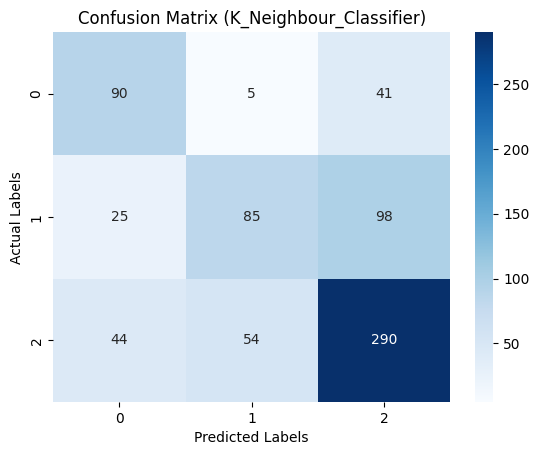

In [95]:
# Afficher la matrice de confusion en utilisant une carte thermique
sns.heatmap(confu_5, annot=True, cmap='Blues', fmt='g')

# Ajouter des étiquettes aux axes
plt.xlabel("Étiquettes Prédites")
plt.ylabel("Étiquettes Réelles")

# Ajouter un titre au graphique
plt.title("Matrice de Confusion (K_Neighbour_Classifier)")

# Afficher le graphique
plt.show()


**Note :** La recherche par force brute est une approche directe pour résoudre un problème en explorant de manière exhaustive toutes les solutions possibles sans utiliser de heuristiques ou d'optimisations.


In [96]:
from sklearn.neural_network import MLPClassifier

# Définir MLPClassifier avec les hyperparamètres spécifiés
model_6 = MLPClassifier(
    hidden_layer_sizes=(300,),  # Taille de la couche cachée
    max_iter=300,               # Nombre maximum d'itérations
    activation='logistic',      # Fonction d'activation pour la couche cachée
    solver='adam',              # Solveur pour l'optimisation des poids
    alpha=0.0001,               # Paramètre de pénalité L2 (terme de régularisation)
    random_state=1              # Graine aléatoire pour la reproductibilité
)

# Définir le pipeline avec le préprocesseur et MLPClassifier
my_pipeline_6 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model_6)
])

# Entraîner le pipeline sur les données d'entraînement
my_pipeline_6.fit(X_train, y_train)

# Faire des prédictions sur les données de validation
preds_6 = my_pipeline_6.predict(X_valid)

# Calculer les métriques d'évaluation
confu_6 = confusion_matrix(y_valid, preds_6)
accu_6 = accuracy_score(y_valid, preds_6)
preci_6 = precision_score(y_valid, preds_6, average='micro')
recall_6 = recall_score(y_valid, preds_6, average='micro')

# Afficher les métriques d'évaluation
print("Exactitude 6:", accu_6)
print("Précision 6:", preci_6)


Accuracy 6: 0.6489071038251366
Precision 6: 0.6489071038251366


### 7. Catboost Classifier
* **Catboost** est une bibliothèque de machine learning.
* Elle est conçue pour le boosting, une technique qui combine de nombreux modèles simples pour faire de meilleures prédictions.
* Elle est particulièrement efficace avec les données contenant à la fois des caractéristiques numériques et catégorielles.
* CatBoost gère automatiquement les caractéristiques catégorielles sans nécessiter de prétraitement.
* Elle construit des arbres de décision, chacun corrigeant les erreurs des précédents.
* Les prédictions combinées de tous les arbres résultent généralement en des prédictions plus précises.
* CatBoost automatise de nombreux aspects de la construction des arbres pour de meilleures performances.
* **Conclusions** : CatBoost aide à construire des modèles prédictifs puissants et précis avec facilité.


### Hyperparameters Tuning
* **iterations** - Nombre d'itérations de boosting à exécuter
* **learning_rate** - Taille du pas à chaque itération
* **depth** - Profondeur maximale de chaque arbre
* **l2_leaf_reg** - Force de la régularisation L2
* **rsm** - Ratio de sélection aléatoire des caractéristiques pour chaque arbre
* **loss_function** - Type de fonction de perte à optimiser
* **border_count** - Nombre de divisions pour les caractéristiques numériques
* **od_wait** - Nombre d'itérations sans amélioration significative pour arrêter l'entraînement en cas d'arrêt anticipé
* **nan_mode** - Comment les valeurs manquantes sont-elles traitées ?
* **thread_count** - Nombre de threads à utiliser pour l'entraînement
* **random_seed** - Graine pour la génération de nombres aléatoires
* **classes_count** - Nombre de classes dans la variable cible
* **boosting_type** - Type d'algorithme de boosting à utiliser
* **subsample** - Fraction des données d'entraînement à utiliser pour chaque arbre
* **max_depth** - Profondeur maximale des arbres (alternative à depth)
* **n_estimators** - Nombre d'arbres à construire (alternative à 'iterations')
* **early_stopping_rounds** - Nombre de tours sans amélioration pour déclencher l'arrêt anticipé
* **cat_features** - Indices des caractéristiques catégorielles
* **task_type** - Type de tâche, par exemple 'CPU' ou 'GPU'
* **grow_policy** - Politique de croissance des arbres, par exemple 'SymmetricTree' ou 'DepthWise'
* **min_data_in_leaf** - Nombre minimum d'échantillons dans une feuille
* **num_leaves** - Nombre maximum de feuilles dans chaque arbre
* **score_function** - Métrique d'évaluation à optimiser
* **text_features, tokenizers, dictionaries** - Paramètres pour la gestion des caractéristiques textuelles


In [ ]:
!pip install catboost



In [99]:
# Importation de la bibliothèque CatBoostClassifier
from catboost import CatBoostClassifier

# Initialisation du modèle CatBoostClassifier avec des hyperparamètres spécifiques
model_7 = CatBoostClassifier(iterations=5000,  # Nombre d'itérations de boosting
                             learning_rate=0.1,  # Taux d'apprentissage (0.1 donne une précision de 76.5)
                             depth=7,  # Profondeur maximale des arbres (7 donne une précision de 76.8)
                             l2_leaf_reg=3.0,  # Régularisation L2
                             loss_function='MultiClass',  # Fonction de perte pour classification multi-classes
                             rsm=1.0,  # Ratio de sélection aléatoire des caractéristiques (1.0 donne une précision de 76.8)
                             border_count=100,  # Nombre de divisions pour les caractéristiques numériques
                             random_state=1,  # Graine pour la reproductibilité
                             verbose=0)  # Niveau de verbosité

# Création du pipeline avec un préprocesseur et le modèle CatBoostClassifier
my_pipeline_7 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Étape de prétraitement
    ("model", model_7)  # Étape du modèle
])

# Entraînement du pipeline sur les données d'entraînement
my_pipeline_7.fit(X_train, y_train)

# Prédiction sur les données de validation
preds_7 = my_pipeline_7.predict(X_valid)

# Calcul de la matrice de confusion
confu_7 = confusion_matrix(y_valid, preds_7)

# Calcul de la précision
preci_7 = precision_score(y_valid, preds_7, average='micro')

# Calcul de l'exactitude
accu_7 = accuracy_score(y_valid, preds_7)

# Calcul du rappel
recall_7 = recall_score(y_valid, preds_7, average='micro')

# Affichage des résultats
print("Exactitude du CatBoostClassifier:", accu_7)
print("Précision du CatBoostClassifier:", preci_7)


Exactitude du CatBoostClassifier: 0.7800546448087432
Précision du CatBoostClassifier: 0.7800546448087432


In [100]:
# Les valeurs d'exactitude pour différents modèles
accu_1, accu_2, accu_3, accu_4, accu_5, accu_6, accu_7


(0.7841530054644809,
 0.657103825136612,
 0.7240437158469946,
 0.6475409836065574,
 0.6352459016393442,
 0.6489071038251366,
 0.7800546448087432)

In [101]:
# Importation de la classe SVC de sklearn.svm
from sklearn.svm import SVC

# Initialisation du modèle SVC avec des hyperparamètres spécifiques
model_8 = SVC(random_state=1,  # Graine pour la reproductibilité
              kernel='rbf',  # Type de noyau utilisé dans l'algorithme
              gamma='auto',  # Coefficient de noyau
              tol=1e-3,  # Tolérance pour les critères d'arrêt
              decision_function_shape='ovr')  # Forme de la fonction de décision

# Création du pipeline avec un préprocesseur et le modèle SVC
my_pipeline_8 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Étape de prétraitement
    ("model", model_8)  # Étape du modèle
])

# Entraînement du pipeline sur les données d'entraînement
my_pipeline_8.fit(X_train, y_train)

# Prédiction sur les données de validation
preds_8 = my_pipeline_8.predict(X_valid)

# Calcul de la matrice de confusion
confu_8 = confusion_matrix(y_valid, preds_8)

# Calcul de la précision
preci_8 = precision_score(y_valid, preds_8, average='micro')

# Calcul de l'exactitude
accu_8 = accuracy_score(y_valid, preds_8)

# Calcul du rappel
recall_8 = recall_score(y_valid, preds_8, average='micro')

# Affichage des résultats
print("Exactitude du SVC:", accu_8)
print("Précision du SVC:", preci_8)


Exactitude du SVC: 0.6516393442622951
Précision du SVC: 0.6516393442622951


In [102]:
# Importation de la classe GradientBoostingClassifier de sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier as GBC

# Initialisation du modèle GradientBoostingClassifier avec des hyperparamètres spécifiques
model_9 = GBC(random_state=1,  # Graine pour la reproductibilité
              n_estimators=100,  # Nombre d'arbres dans le modèle
              loss='log_loss',  # Fonction de perte à optimiser
              learning_rate=0.1,  # Taux d'apprentissage
              subsample=1.0,  # Fraction des échantillons utilisés pour chaque arbre
              criterion='squared_error',  # Critère pour mesurer la qualité d'une scission
              min_samples_split=2,  # Nombre minimum d'échantillons pour diviser un nœud
              max_depth=10,  # Profondeur maximale des arbres
              tol=1e-4)  # Tolérance pour les critères d'arrêt

# Création du pipeline avec un préprocesseur et le modèle GradientBoostingClassifier
my_pipeline_9 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Étape de prétraitement
    ("model", model_9)  # Étape du modèle
])

# Entraînement du pipeline sur les données d'entraînement
my_pipeline_9.fit(X_train, y_train)

# Prédiction sur les données de validation
preds_9 = my_pipeline_9.predict(X_valid)

# Calcul de la matrice de confusion
confu_9 = confusion_matrix(y_valid, preds_9)

# Calcul de la précision
preci_9 = precision_score(y_valid, preds_9, average='micro')

# Calcul de l'exactitude
accu_9 = accuracy_score(y_valid, preds_9)

# Calcul du rappel
recall_9 = recall_score(y_valid, preds_9, average='micro')

# Affichage des résultats
print("Exactitude du GradientBoostingClassifier:", accu_9)
print("Précision du GradientBoostingClassifier:", preci_9)


Exactitude du GradientBoostingClassifier: 0.7827868852459017
Précision du GradientBoostingClassifier: 0.7827868852459017


In [103]:
# Importation de la classe AdaBoostClassifier de sklearn.ensemble
from sklearn.ensemble import AdaBoostClassifier as ABC

# Initialisation du modèle AdaBoostClassifier avec des hyperparamètres spécifiques
model_10 = ABC(random_state=1,  # Graine pour la reproductibilité
               n_estimators=100,  # Nombre d'estimateurs
               algorithm='SAMME')  # Algorithme utilisé pour la mise à jour des poids

# Création du pipeline avec un préprocesseur et le modèle AdaBoostClassifier
my_pipeline_10 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Étape de prétraitement
    ("model", model_10)  # Étape du modèle
])

# Entraînement du pipeline sur les données d'entraînement
my_pipeline_10.fit(X_train, y_train)

# Prédiction sur les données de validation
preds_10 = my_pipeline_10.predict(X_valid)

# Calcul de la matrice de confusion
confu_10 = confusion_matrix(y_valid, preds_10)

# Calcul de la précision
preci_10 = precision_score(y_valid, preds_10, average='micro')

# Calcul de l'exactitude
accu_10 = accuracy_score(y_valid, preds_10)

# Calcul du rappel
recall_10 = recall_score(y_valid, preds_10, average='micro')

# Affichage des résultats
print("Exactitude du AdaBoostClassifier:", accu_10)
print("Précision du AdaBoostClassifier:", preci_10)


Exactitude du AdaBoostClassifier: 0.6489071038251366
Précision du AdaBoostClassifier: 0.6489071038251366


In [106]:
# Importation de la classe XGBClassifier de xgboost et de LabelEncoder de sklearn.preprocessing
from xgboost import XGBClassifier as XGBC
from sklearn.preprocessing import LabelEncoder

# Encodage des étiquettes de sortie pour les ensembles d'entraînement et de validation
label_encoder = LabelEncoder()
y_train_encode = label_encoder.fit_transform(y_train)
y_valid_encode = label_encoder.fit_transform(y_valid)

# Initialisation du modèle XGBClassifier avec des hyperparamètres spécifiques
model_11 = XGBC(random_state=1,  # Graine pour la reproductibilité
                n_estimators=100,  # Nombre d'estimateurs
                num_class=len(label_encoder.classes_),  # Nombre de classes
                eta=0.4,  # Taux d'apprentissage
                max_depth=10,  # Profondeur maximale de l'arbre
                subsample=0.6)  # Fraction des échantillons utilisés pour chaque arbre

# Création du pipeline avec un préprocesseur et le modèle XGBClassifier
my_pipeline_11 = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Étape de prétraitement
    ("model", model_11)  # Étape du modèle
])

# Entraînement du pipeline sur les données d'entraînement encodées
my_pipeline_11.fit(X_train, y_train_encode)

# Prédiction sur les données de validation encodées
preds_11 = my_pipeline_11.predict(X_valid)

# Calcul de la matrice de confusion
confu_11 = confusion_matrix(y_valid_encode, preds_11)

# Calcul de la précision
preci_11 = precision_score(y_valid_encode, preds_11, average='micro')

# Calcul de l'exactitude
accu_11 = accuracy_score(y_valid_encode, preds_11)

# Calcul du rappel
recall_11 = recall_score(y_valid_encode, preds_11, average='micro')

# Affichage des résultats
print("Exactitude du XGBoostClassifier:", accu_11)
print("Précision du XGBoostClassifier:", preci_11)


Exactitude du XGBoostClassifier: 0.7814207650273224
Précision du XGBoostClassifier: 0.7814207650273224


In [107]:
# Création d'une liste des précisions des différents algorithmes
accu_total = [accu_1, accu_2, accu_3, accu_4, accu_5, accu_6, accu_7, accu_8, accu_9, accu_10, accu_11]

# Création d'une liste des noms des algorithmes utilisés
algo_names = ['RandomForest',
              'LogisticRegression',
              'DecisionTree',
              'MultinomialNB',
              'KNN',
              'MLPClassifier',
              'CatBoostClassifier',
              'SupportVectorClassifier',
              'GradientBoostingClassifier',
              'AdaBoostClassifier',
              'XGBoostClassifier']

# Création d'un dictionnaire pour stocker les noms des algorithmes et leurs précisions respectives
data = {'AlgoNames': algo_names,
        'Accuracy': accu_total}

# Conversion du dictionnaire en DataFrame pour une meilleure visualisation
accu_table = pd.DataFrame(data)

# Affichage de la table des précisions des algorithmes
accu_table


,AlgoNames,Accuracy
0,RandomForest,0.784153
1,LogisticRegression,0.657104
2,DecisionTree,0.724044
3,MultinomialNB,0.647541
4,KNN,0.635246
5,MLPClassifier,0.648907
6,CatBoostClassifier,0.780055
7,SupportVectorClassifier,0.651639
8,GradientBoostingClassifier,0.782787
9,AdaBoostClassifier,0.648907


In [108]:
# Affichage des données de validation
X_valid

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Num_ofDelayd_Payment
2694,July,Media_Manager,9307.24,1013.603333,4,3,15,3,26,12.0,12.78,5.0,Standard,486.05,28.075528,Yes,20.887196,74.696215,295.776923,12
3386,March,Journalist,21846.06,1978.505000,2,6,8,-100,6,7.0,0.95,2.0,Good,284.95,26.530958,No,22.095944,28.838232,386.916324,7
143,August,Teacher,32284.62,2898.385000,6,7,17,6,13,12.0,2.22,10.0,Standard,1283.37,27.930124,Yes,103.037560,359.771832,117.029107,12
3664,January,_______,21364.20,1728.350000,3,3,17,1,6,16.0,9.10,6.0,Standard,1178.60,24.656482,Yes,9.230471,68.178901,355.425628,16
894,July,Musician,20188.02,1851.335000,4,3,6,3,9,6.0,1.31,0.0,Good,399.92,24.021682,No,25.580281,50.967868,358.585351,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,August,Entrepreneur,115800.54,9860.045000,4,4,9,1,2,2.0,11.90,2.0,Good,194.96,27.386548,No,81.742036,235.233329,939.029136,2
1516,May,Entrepreneur,29999.94,2767.995000,10,9,15,5,42,21.0,7.67,10.0,_,2593.23,33.266899,Yes,101.647484,106.673037,358.478979,21
2290,March,_______,47275.96,4238.663333,6,3,4,4,18,18.0,9.43,2.0,Good,302.10,30.405413,No,121.928877,74.364998,487.572459,18
850,March,Lawyer,66528.24,5733.020000,5,5,11,0,15,9.0,13.65,2.0,Standard,1460.80,32.533873,Yes,0.000000,98.827554,724.474446,9


In [109]:
# Affichage des noms de colonnes du DataFrame X_valid
X_valid.columns

Index(['Month', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Num_ofDelayd_Payment'],
      dtype='object')

In [110]:
# Affichage des données de validation
X_valid

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Num_ofDelayd_Payment
2694,July,Media_Manager,9307.24,1013.603333,4,3,15,3,26,12.0,12.78,5.0,Standard,486.05,28.075528,Yes,20.887196,74.696215,295.776923,12
3386,March,Journalist,21846.06,1978.505000,2,6,8,-100,6,7.0,0.95,2.0,Good,284.95,26.530958,No,22.095944,28.838232,386.916324,7
143,August,Teacher,32284.62,2898.385000,6,7,17,6,13,12.0,2.22,10.0,Standard,1283.37,27.930124,Yes,103.037560,359.771832,117.029107,12
3664,January,_______,21364.20,1728.350000,3,3,17,1,6,16.0,9.10,6.0,Standard,1178.60,24.656482,Yes,9.230471,68.178901,355.425628,16
894,July,Musician,20188.02,1851.335000,4,3,6,3,9,6.0,1.31,0.0,Good,399.92,24.021682,No,25.580281,50.967868,358.585351,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,August,Entrepreneur,115800.54,9860.045000,4,4,9,1,2,2.0,11.90,2.0,Good,194.96,27.386548,No,81.742036,235.233329,939.029136,2
1516,May,Entrepreneur,29999.94,2767.995000,10,9,15,5,42,21.0,7.67,10.0,_,2593.23,33.266899,Yes,101.647484,106.673037,358.478979,21
2290,March,_______,47275.96,4238.663333,6,3,4,4,18,18.0,9.43,2.0,Good,302.10,30.405413,No,121.928877,74.364998,487.572459,18
850,March,Lawyer,66528.24,5733.020000,5,5,11,0,15,9.0,13.65,2.0,Standard,1460.80,32.533873,Yes,0.000000,98.827554,724.474446,9


In [111]:
# Affichage du titre de la prédiction de score de crédit
print("Credit Score Prediction")

# Demande de saisie des informations nécessaires pour la prédiction
a1 = input("Enter Month:")  # Mois
a2 = input("Enter Occupation:")  # Profession
a3 = input("Enter Annual_income:")  # Revenu annuel
a4 = input("Enter Monthly_inhand_Salary:")  # Salaire mensuel en main
a5 = input("Enter Num_Bank_Accounts:")  # Nombre de comptes bancaires
a6 = input("Enter Num_Credit_Card:")  # Nombre de cartes de crédit
a7 = input("Enter Interest_Rate:")  # Taux d'intérêt
a8 = input("Enter Num_of_Loan:")  # Nombre de prêts
a9 = input("Enter Delay_from_due_date:")  # Retard par rapport à la date d'échéance
a10 = input("Enter Num_of_Delayed_Payment:")  # Nombre de paiements retardés
a11 = input("Enter Changed_Credit_Limit:")  # Limite de crédit modifiée
a12 = input("Enter Num_Credit_Inquiries:")  # Nombre de demandes de crédit
a13 = input("Enter Credit_Mix:")  # Mix de crédit
a14 = input("Enter Outstanding_Debt:")  # Dette en cours
a15 = input("Enter Credit_Utilization_Ratio:")  # Ratio d'utilisation du crédit
a16 = input("Enter Payment_of_Min_Amount:")  # Paiement du montant minimum
a17 = input("Enter Total_EMI_per_month:")  # EMI total par mois
a18 = input("Enter Amount_invested_monthly:")  # Montant investi mensuellement
a19 = input("Enter Num_ofDelayd_Payment:")  # Nombre de paiements retardés (erreur de frappe)
a20 = input("Enter Num_of_Delayed_Payment:")  # Nombre de paiements retardés (corrigé)


Credit Score Prediction
